In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

In this section of the book we will dive more into the algorithm of linear regression. 

<img src="linear_regression_formula.png" style="width:500px;height:200px;" />

In the above equation we can see a linear regression formula. We will be exploring how to optimize this model.

The first method is the <strong> Normal Equation </strong>. This is a closed formed solution or a mathematical equestion that gives the result directly. 

<img src="normal_equation.png" style="width:300px;height:200px;" />

In the above formula theta is the value that minimizes the cost function and y is the vector of target values containing y(1) to y(m)

In [2]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

Saving figure generated_data_plot


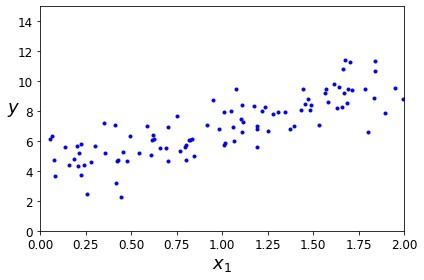

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
print(theta_best)

[[4.05470406]
 [2.92873378]]


In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.05470406],
       [9.91217162]])

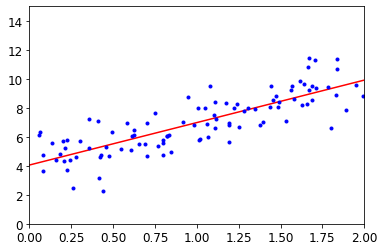

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Building a linear regression model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([4.05470406]), array([[2.92873378]]))

In [14]:
lin_reg.predict(X_new)

array([[4.05470406],
       [9.91217162]])

Using the small regression model above we have trained our data and we havec created a prediction.

We can see that it intercepts at roughly at 4.05 section.  The intercept represents the mean of all Y values when X = 0. 

What a linear regression model is using is a function called scipy.linalg.lstsq(). This is a much more efficient way to identify the best possible parameters than using a normal question. 

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [16]:
theta_best_svd

array([[4.05470406],
       [2.92873378]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[4.05470406],
       [2.92873378]])

### Computational Complexity

The Normal Equation is usually O(n^2.4) up to O(n^3). This is not very efficient. 

The normal equation is often very slow when working with a large number of features or instances(data set size). Though the predictions are very fast. 

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. 

Gradient Descent measures the local gradient of the error function with regard to the parameter vector and it goes in the direction of descending graident . Once it reaches zero it means you have reached the minimum. 

<img src="images/training_linear_models/gradient_descent_minimum.jpeg ">

A important parameter in gradient descent is the learning rate. A small learning rate might take too long to reach the minimum and a large learning rate might make you miss the minimum

<strong>Batch Gradient Descent </strong>

Batch gradient descent is when you computing all paramters theta at once. 



In [21]:
#Quick implementation of gradient descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [22]:
theta

array([[4.05470406],
       [2.92873378]])

We see that BAG got us the same results of normal equation 

<strong> Stochastic Gradient Descent </strong>

SGD picks a random instance in the training set at every step and computes the gradients based only on that single instance.  The benefit of this over BGD is that BGD takes a very long time on very large datasets.

This approach will cause the cost function to bounce up and down descraing only on average. It will stop when the results are good but it might not be the optimal minimum. 

SGD is useful to use when the cost function is very irregular and jumps out of the local minimum. 

In [27]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


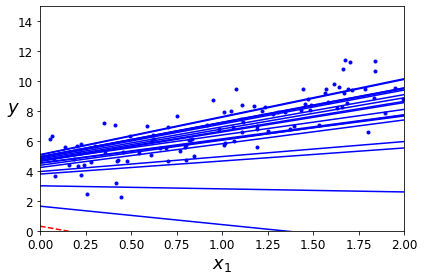

In [29]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [25]:
theta

array([[4.06240875],
       [2.93864574]])

<strong> Mini-batch Gradient Descent </strong>

Mini batch gradient descent is a mix between batch and stochastic. It basically in shorts gets a random set of instances and finds the gradient. It gives you a performance boost compared to other options like SGD and much faster than BDG. 

It is less erratic than SGD it will get closer to the optimum minimum vs SGD. 

<strong> Polynominal Regression </strong>

THis is a option when the data is not a straight line. What it does is that it adds powers to each features than trains the linear model on a extended set of features. 

Saving figure quadratic_data_plot


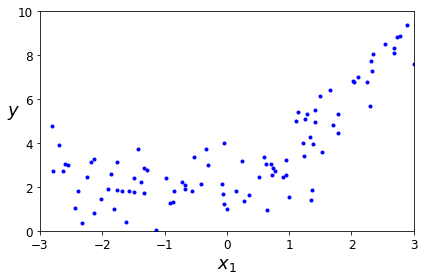

In [30]:
#Building a polynominal regression graph
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)



plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

We can see above the data has a slight curve and if we tried to fit a linear model it will not provide a good fit

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.76867948])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02301132]), array([[1.00929338, 0.51805922]]))

Saving figure quadratic_predictions_plot


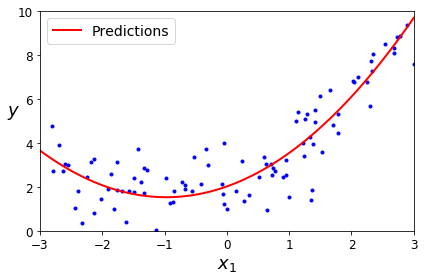

In [33]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure high_degree_polynomials_plot


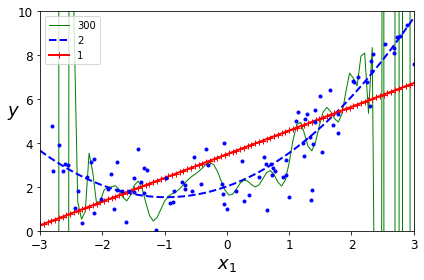

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

If you use a high degree polynominal model say to 300 degree it will tend to move slower but improve performance.

However we can see above it overfitted the data. So what is the best learning curve. Well we can compare that by printing out the learning curves

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


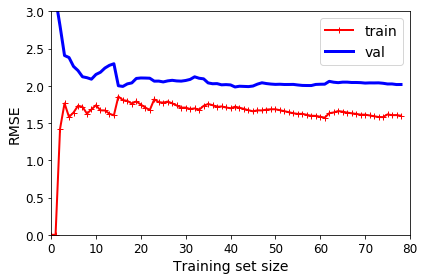

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()   

What we see above is a example low  bias  where the training and validation data both plateau. 

This indicates underfitting because there is a small gap between the training and validation performance. This suggest to improve the features or provide a higher degree of polynominal features. 

Saving figure learning_curves_plot


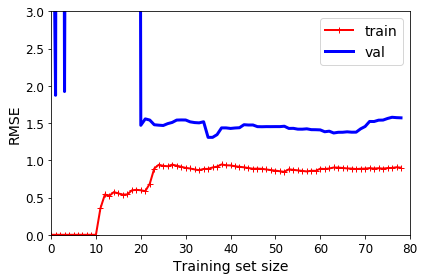

In [38]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

Here we have a high variance which is a distance between the training performance and the validation performance. 

A good way to handle overfitting is to use regulization. This means to constrain the model so it has fewer degrees of freedom. The simple way of doing this is to reduce the number of polynominal degrees. 

#### Ridge Regression

This is also known as L2 regulization. 